# Machine Learning method to find patient segments within RNAseq features of breast cancer patients

### Import all relevant libraries

In [1]:
import pandas as pd
import matplotlib.gridspec as gridspec
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame as df
# DEFINE MY OWN CMAP = Rd-Black-Gy
import matplotlib.colors as mcolors
cdict={'red': ((0.0,0.0,0.0),(0.5,0.0,0.0),(1.0,1.0,1.0)),
        'blue': ((0.0,0.0,0.0),(1.0,0.0,0.0)),
        'green': ((0.0,0.0,1.0),(0.5,0.0,0.0),(1.0,0,0))}

cmap1=mcolors.LinearSegmentedColormap('my_colormap',cdict,100)

import seaborn as sns

### Input all data

In [2]:
f=pd.read_csv('../TCGA_BRCA_Tumor_RSEM_GeneExp_filtered_log2.tsv',index_col=0,sep='\t')
f.head()

,TCGA.BH.A0W3.01A.11R.A109.07,TCGA.A8.A07F.01A.11R.A00Z.07,TCGA.GM.A3XL.01A.11R.A22U.07,TCGA.LL.A441.01A.11R.A24H.07,TCGA.BH.A0HP.01A.12R.A084.07,TCGA.D8.A1Y1.01A.21R.A14M.07,TCGA.AO.A12A.01A.21R.A115.07,TCGA.AN.A0XN.01A.21R.A109.07,TCGA.PE.A5DE.01A.11R.A27Q.07,TCGA.A8.A075.01A.11R.A084.07,...,TCGA.E2.A1B0.01A.11R.A12P.07,TCGA.A8.A08J.01A.11R.A00Z.07,TCGA.S3.AA11.01A.31R.A41B.07,TCGA.BH.A0DE.01A.11R.A115.07,TCGA.BH.A1FM.01A.11R.A13Q.07,TCGA.PL.A8LV.01A.21R.A41B.07,TCGA.A2.A4RX.01A.11R.A266.07,TCGA.E9.A243.01A.21R.A169.07,TCGA.A8.A07E.01A.11R.A034.07,TCGA.E9.A228.01A.31R.A157.07
SCGB2A2,7.995579,6.437159,0.588185,7.240104,12.160156,6.277967,4.936269,8.807030,10.622958,7.138458,...,11.033707,8.080825,3.467670,9.705156,1.040158,1.366776,1.422622,0.071430,4.058771,0.254701
SCGB1D2,6.650415,5.677596,1.098930,6.085620,11.418619,5.049693,4.947067,6.952681,8.917318,5.694037,...,7.511125,7.715853,2.733740,7.258169,1.080194,1.010610,0.682176,0.014231,2.881080,1.276865
TFF1,8.889143,7.580828,1.051410,2.678933,5.808478,6.819601,8.007576,1.809403,9.894923,8.345406,...,0.303680,3.678954,8.659648,8.416123,3.840113,1.581678,2.432916,4.572109,7.663364,9.894923
PIP,9.894923,6.440065,5.065625,6.440065,9.279767,8.530492,8.707173,3.432688,5.364195,4.167533,...,1.956252,3.109031,6.085620,7.961493,2.850932,2.059863,3.522624,7.697993,5.841955,0.440105
CPB1,2.886600,0.315127,0.052862,1.428191,0.376981,0.178075,2.254173,0.095700,0.003478,2.264022,...,0.081904,10.235505,0.284350,3.681831,3.365267,0.078476,0.308187,0.272251,0.153975,11.418619


**We are now changing the delimiter structure of column names from "." to "-"**

In [3]:
f.columns=['-'.join(f.columns[i].split('.')) for i in range(f.shape[1])]
f.head()

,TCGA-BH-A0W3-01A-11R-A109-07,TCGA-A8-A07F-01A-11R-A00Z-07,TCGA-GM-A3XL-01A-11R-A22U-07,TCGA-LL-A441-01A-11R-A24H-07,TCGA-BH-A0HP-01A-12R-A084-07,TCGA-D8-A1Y1-01A-21R-A14M-07,TCGA-AO-A12A-01A-21R-A115-07,TCGA-AN-A0XN-01A-21R-A109-07,TCGA-PE-A5DE-01A-11R-A27Q-07,TCGA-A8-A075-01A-11R-A084-07,...,TCGA-E2-A1B0-01A-11R-A12P-07,TCGA-A8-A08J-01A-11R-A00Z-07,TCGA-S3-AA11-01A-31R-A41B-07,TCGA-BH-A0DE-01A-11R-A115-07,TCGA-BH-A1FM-01A-11R-A13Q-07,TCGA-PL-A8LV-01A-21R-A41B-07,TCGA-A2-A4RX-01A-11R-A266-07,TCGA-E9-A243-01A-21R-A169-07,TCGA-A8-A07E-01A-11R-A034-07,TCGA-E9-A228-01A-31R-A157-07
SCGB2A2,7.995579,6.437159,0.588185,7.240104,12.160156,6.277967,4.936269,8.807030,10.622958,7.138458,...,11.033707,8.080825,3.467670,9.705156,1.040158,1.366776,1.422622,0.071430,4.058771,0.254701
SCGB1D2,6.650415,5.677596,1.098930,6.085620,11.418619,5.049693,4.947067,6.952681,8.917318,5.694037,...,7.511125,7.715853,2.733740,7.258169,1.080194,1.010610,0.682176,0.014231,2.881080,1.276865
TFF1,8.889143,7.580828,1.051410,2.678933,5.808478,6.819601,8.007576,1.809403,9.894923,8.345406,...,0.303680,3.678954,8.659648,8.416123,3.840113,1.581678,2.432916,4.572109,7.663364,9.894923
PIP,9.894923,6.440065,5.065625,6.440065,9.279767,8.530492,8.707173,3.432688,5.364195,4.167533,...,1.956252,3.109031,6.085620,7.961493,2.850932,2.059863,3.522624,7.697993,5.841955,0.440105
CPB1,2.886600,0.315127,0.052862,1.428191,0.376981,0.178075,2.254173,0.095700,0.003478,2.264022,...,0.081904,10.235505,0.284350,3.681831,3.365267,0.078476,0.308187,0.272251,0.153975,11.418619


*__Size of this matrix is__: **5000 gene features** (rows) X **1102 patient tumors** (columns)*

In [79]:
f.shape

(5000, 1102)

# Unsupervised learning from python's scikit-learn package

Resource: https://scikit-learn.org/stable/unsupervised_learning.html
_____

### Lets look at PCA plot of our data

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
f_PCA_DF=df(data=pca.fit_transform(f.T),columns=['PC1','PC2'])
f_PCA_DF.shape

(1102, 2)

In [53]:
f_PCA_DF.head()

,PC1,PC2
0,-35.994631,19.467807
1,-15.690792,-9.026793
2,53.849633,29.998110
3,40.998438,-10.303355
4,-14.346454,-18.316678


### Often PCA is affected by the different scale of features. 
*Although in my previous preprocessing I did quantile normalization, I'm going to try scaling function from sklearn for **due-diligence process**. This is often required during big-data analysis*

In [6]:
from sklearn.preprocessing import StandardScaler
f_PCA_DF1=df(data=pca.fit_transform(StandardScaler().fit_transform(f.T)),columns=['PC1','PC2'])
f_PCA_DF1.head()

,PC1,PC2
0,-31.085155,-18.573677
1,-23.041379,19.793792
2,59.047275,-16.470325
3,40.666456,6.196305
4,-16.585442,3.002579


### It appears that quantile normalization process in my RNASeq preprocessing step was pretty good. This gives us almost same results

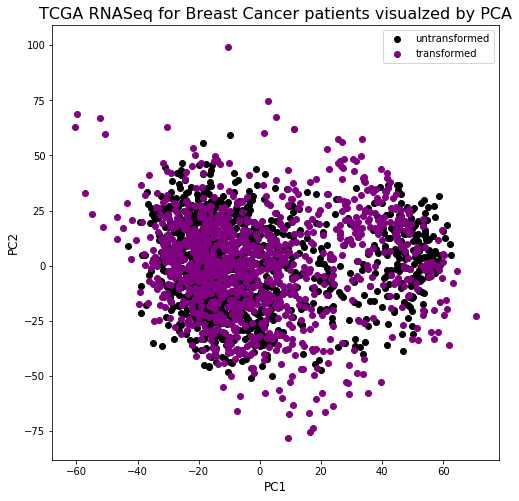

In [64]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 12)
ax.set_ylabel('PC2', fontsize = 12)
ax.set_title('TCGA RNASeq for Breast Cancer patients visualzed by PCA', fontsize = 16)
ax.scatter(f_PCA_DF.PC1,f_PCA_DF.PC2,color="black")
ax.scatter(f_PCA_DF1.PC1,f_PCA_DF1.PC2,color="purple")
ax.legend(["untransformed","transformed"])

## Lets determine the optimum number of feature sets to begin with optimizing number of features

### First I'm going to change the number of features. These features are currently ranked in descending order of variances.
**Variances allow us to separate patients into different identifyable cohorts. High variance features will have good separation and detection capabilities to identify patient segments**

*We can see the number of features used did not visually affect the number of possibly identifyable clusters here*

In [7]:
def PCA_nR(f,nR):
    pca = PCA(n_components=2)
    f_PCA_DF=df(data=pca.fit_transform(f.iloc[1:nR,:].T),columns=['PC1','PC2'])
    return(f_PCA_DF)

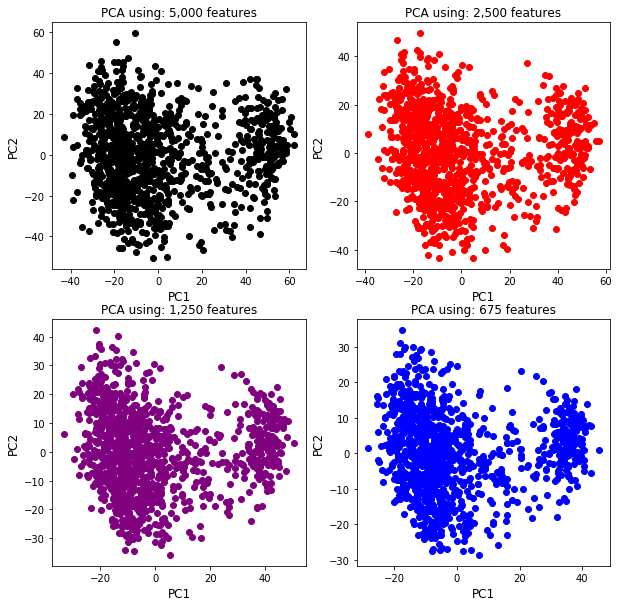

In [8]:
colss=['black','red','purple','blue']
nms=['5,000 features','2,500 features','1,250 features','675 features']
nR=[5000,2500,1250,675]
fig = plt.figure(figsize = (10,10))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1) 
    ax.set_xlabel('PC1', fontsize = 12)
    ax.set_ylabel('PC2', fontsize = 12)
    ax.set_title('PCA using: '+nms[i], fontsize = 12)
    f_PCA_DF=PCA_nR(f,nR[i])
    ax.scatter(f_PCA_DF.PC1,f_PCA_DF.PC2,color=colss[i])

## Gasussian mixture model
*This statistical model assumes that the mixture is generated by a finite number of guassian distributions with unknown number of parameters*

*...coming soon*

Lets comparison guassian mixture model and compare it with kmeans clustering to see how well the clusters separate our patients

In [40]:
#Guassian mixture model
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 4)
gmm.fit(f.T)
gmm_clus = gmm.predict(f.T)+1

In [38]:
#Kmeans clustering for comparison
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmm = kmeans.fit(f.T)
kmm_clus = kmm.predict(f.T)+1

**Beyond K=4, *kmeans clustering* gets more mixed results in predictions. K=4 is optimal set of clusters (just visually speaking)**

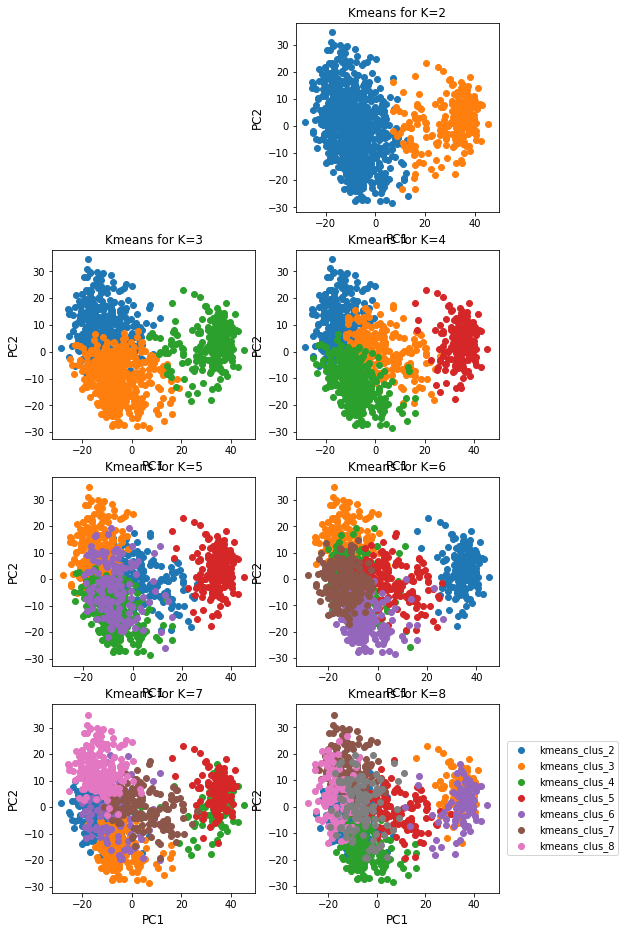

In [66]:
def KMM_k(f,k):
    kmeans = KMeans(n_clusters=k)
    kmm = kmeans.fit(f.T)
    kmm_clus = kmm.predict(f.T)+1
    return(kmm_clus)

#colss=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
colss=sns.color_palette()
K=np.arange(2,9,1)
fig = plt.figure(figsize = (8,16))

for i in range(len(K)):
    ax = fig.add_subplot(4,2,i+2) 
    ax.set_xlabel('PC1', fontsize = 12)
    ax.set_ylabel('PC2', fontsize = 12)
    ax.set_title('Kmeans for K='+str(K[i]), fontsize = 12)
    kmm_clus_temp=KMM_k(f,K[i])
    for j in range(K[i]):
        ax.scatter(f_PCA_DF.PC1[kmm_clus_temp==(j+1)],f_PCA_DF.PC2[kmm_clus_temp==(j+1)],color=colss[j])

ax.legend(["kmeans_clus_"+str(q) for q in K],bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

**Beyond K=4, *Guassian Mixture Model* gets more mixed results in predictions. K=4 is optimal set of clusters (just visually speaking)**

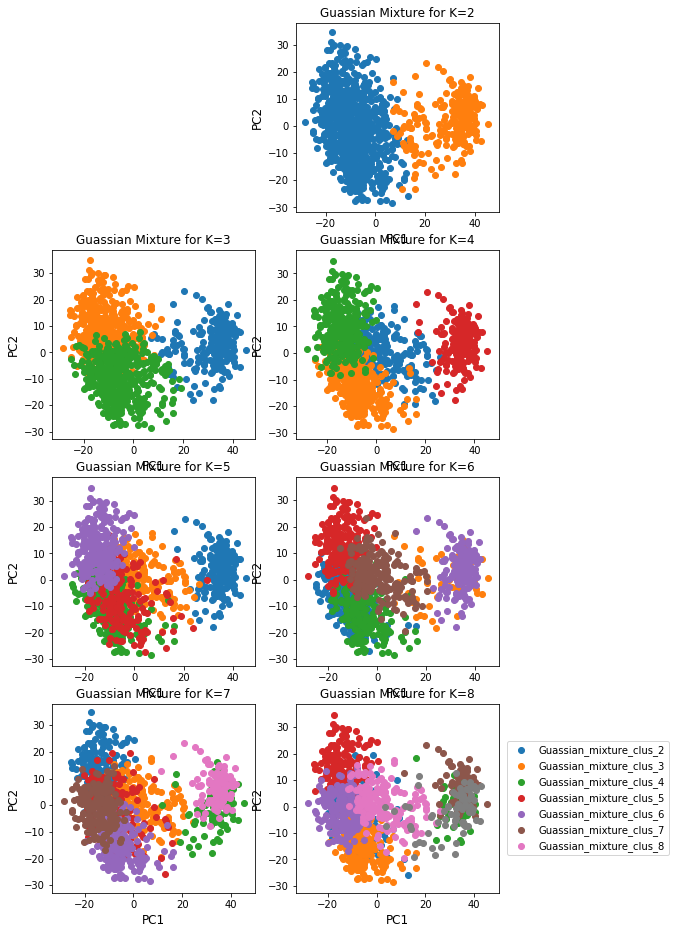

In [67]:
def GMM_k(f,k):
    gmm = mixture.GaussianMixture(n_components = k)
    gmm.fit(f.T)
    gmm_clus = gmm.predict(f.T)+1
    return(gmm_clus)

#colss=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
colss=sns.color_palette()
K=np.arange(2,9,1)
fig = plt.figure(figsize = (8,16))

for i in range(len(K)):
    ax = fig.add_subplot(4,2,i+2) 
    ax.set_xlabel('PC1', fontsize = 12)
    ax.set_ylabel('PC2', fontsize = 12)
    ax.set_title('Guassian Mixture for K='+str(K[i]), fontsize = 12)
    gmm_clus_temp=GMM_k(f,K[i])
    for j in range(K[i]):
        ax.scatter(f_PCA_DF.PC1[gmm_clus_temp==(j+1)],f_PCA_DF.PC2[gmm_clus_temp==(j+1)],color=colss[j])

ax.legend(["Guassian_mixture_clus_"+str(q) for q in K],bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

**For a cluster of k=4, you can see that kmeans does better**

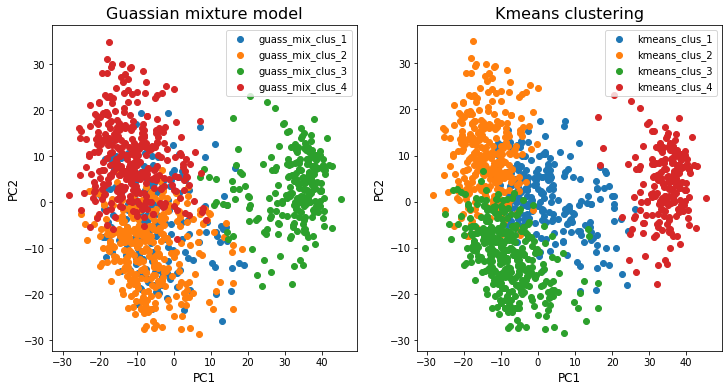

In [71]:
kmm_clus=KMM_k(f,4)
gmm_clus=GMM_k(f,4)

fig = plt.figure(figsize = (12,6))
#Guassian mixture model
ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('PC1', fontsize = 12)
ax.set_ylabel('PC2', fontsize = 12)
ax.set_title('Guassian mixture model', fontsize = 16)
for i in range(4):
    ax.scatter(f_PCA_DF.PC1[gmm_clus==(i+1)],f_PCA_DF.PC2[gmm_clus==(i+1)],color=colss[i])
ax.legend(["guass_mix_clus_"+str(i+1) for i in range(4)])

#Kmeans clustering
ax = fig.add_subplot(1,2,2) 
ax.set_xlabel('PC1', fontsize = 12)
ax.set_ylabel('PC2', fontsize = 12)
ax.set_title('Kmeans clustering', fontsize = 16)
for i in range(4):
    ax.scatter(f_PCA_DF.PC1[kmm_clus==(i+1)],f_PCA_DF.PC2[kmm_clus==(i+1)],color=colss[i])
ax.legend(["kmeans_clus_"+str(i+1) for i in range(4)])

# Effect of distribution nature of each feature in your data

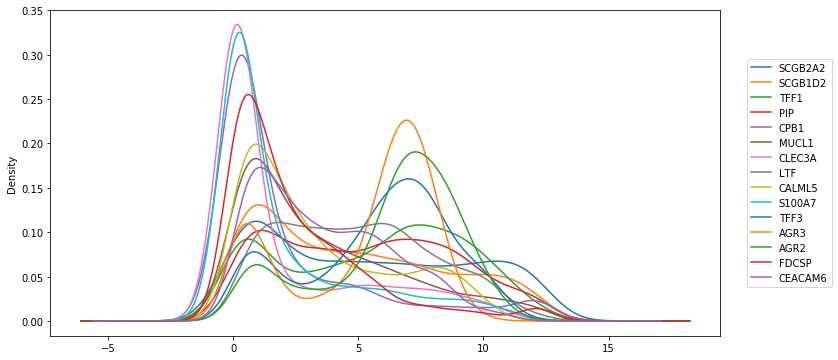

In [100]:
fig1, ax1 = plt.subplots(figsize = (12,6))
f.iloc[0:15,:].T.plot.kde(ax=ax1)
#f.iloc[0:15,:].T.plot.hist(density=True,ax=ax1,legend=False)
ax1.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

In [ ]:
f.iloc[0:15,:].T.plot.kde(ax=ax1)

In [101]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(f.iloc[0:15,:].T)
mm_scaler.transform(f.iloc[0:15,:].T)

array([[6.57329876e-01, 5.46709679e-01, 7.30812924e-01, ...,
        6.45966114e-01, 1.09304521e-02, 2.66130047e-01],
       [5.29099838e-01, 4.66675156e-01, 6.23145511e-01, ...,
        4.96992251e-01, 2.99626160e-02, 2.19255950e-01],
       [4.78339965e-02, 8.99850601e-02, 8.58088016e-02, ...,
        8.90335757e-02, 2.73753829e-01, 1.73216017e-02],
       ...,
       [5.31424109e-03, 7.46079370e-04, 3.75543812e-01, ...,
        5.70821102e-01, 1.00000000e+00, 5.26591356e-01],
       [3.33401097e-01, 2.36603780e-01, 6.29937804e-01, ...,
        6.15518342e-01, 9.06796254e-03, 4.30387694e-01],
       [2.03941634e-02, 1.04623907e-01, 8.13583309e-01, ...,
        8.73075157e-01, 1.39862684e-02, 1.53287789e-01]])

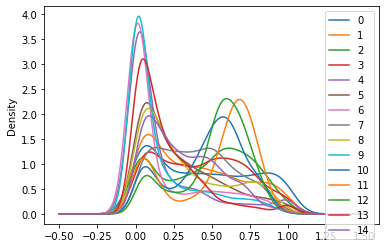

In [105]:
df(mm_scaler.transform(f.iloc[0:15,:].T)).plot.kde()

## We can therefore argue that some features (genes) are most informative at separating population of patients based on density around that feature value (level of expression).
*Feature extraction (PCA) is great for visualizing in 2D space. However, feature selection (reduce dimentionality where features are selected from original feature set) often gives us more interpretable results. For instance, following optimized K-means and other unsupervised (hierarchical cluster) allows us to define clusters. Then, we can use good old statistics to determine important features by anova/t-test between various clusters. A greater different in feature value and a higher statistical significance is a good way to estimate the most informative features*